In [1]:
import pandas as pd
import numpy as np

## 14.5 2012年联邦选举委员会数据库

In [2]:
fec = pd.read_csv('../datasets/fec/P00000001-ALL.csv')
fec.info()

c:\Users\NETSUN_BAIYIN_PC\.conda\envs\pydatabook\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [4]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [3]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [6]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [7]:
unique_cands[2]

'Obama, Barack'

In [8]:
parties = {'Bachmann, Michelle': 'Republican',
            'Cain, Herman': 'Republican',
            'Gingrich, Newt': 'Republican',
            'Huntsman, Jon': 'Republican',
            'Johnson, Gary Earl': 'Republican',
            'McCotter, Thaddeus G': 'Republican',
            'Obama, Barack': 'Democrat',
            'Paul, Ron': 'Republican',
            'Pawlenty, Timothy': 'Republican',
            'Perry, Rick': 'Republican',
            "Roemer, Charles E. 'Buddy' III": 'Republican',
            'Romney, Mitt': 'Republican',
            'Santorum, Rick': 'Republican'}

In [10]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [11]:
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [12]:
(fec.contb_receipt_amt > 0.).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [13]:
fec = fec[fec.contb_receipt_amt > 0.]

In [14]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

### 14.5.1 按职业和雇主的捐献统计

In [16]:
fec.contbr_occupation.value_counts().head(10)

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [19]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}
# 如果没有映射，则返回x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [20]:
fec.contbr_occupation

0                               RETIRED
1                               RETIRED
2                          NOT PROVIDED
3                               RETIRED
4                               RETIRED
5                               RETIRED
6                          NOT PROVIDED
7                               RETIRED
8                                    RN
9                   ELECTRICAL ENGINEER
10                              RETIRED
11                       LAND DEVELOPER
12                         NOT PROVIDED
13                         NOT PROVIDED
14                         NOT PROVIDED
15                            PHYSICIAN
16                              RETIRED
17                              RETIRED
18                              RETIRED
19                              RETIRED
20              OFFICE FURNITURE BROKER
21                              RETIRED
22                              MANAGER
23                              MANAGER
24                              RETIRED


In [26]:
by_occupation = fec.pivot_table(values='contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum', fill_value=0)

In [27]:
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,0.00
AREA VICE PRESIDENT,250.0,0.00
RESEARCH ASSOCIATE,100.0,0.00
TEACHER,500.0,0.00
THERAPIST,3900.0,0.00
'MIS MANAGER,0.0,177.60
(PART-TIME) SALES CONSULTANT & WRITER,0.0,285.00
(RETIRED),0.0,250.00
-,5000.0,2114.80


In [30]:
#过滤出至少捐赠200万美元的子集
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


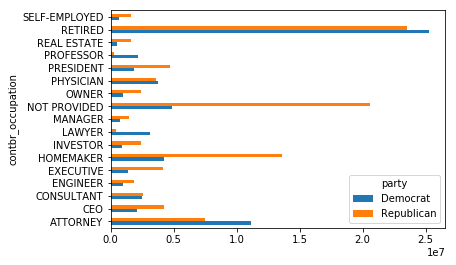

In [33]:
over_2mm.plot.barh()

In [35]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)


In [36]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [37]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=10)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
               PROFESSOR                                  2165071.08
               CEO                                        2073284.79
               PRESIDENT                                  1878509.95
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                          

### 14.5.2 捐赠金额分桶

In [38]:
bins = np.array([0, 1, 10, 1000, 10000, 100000, 1000000, 10000000, 100000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins=bins)
labels

411          (10, 1000]
412          (10, 1000]
413          (10, 1000]
414          (10, 1000]
415          (10, 1000]
416          (10, 1000]
417          (10, 1000]
418          (10, 1000]
419          (10, 1000]
420          (10, 1000]
421          (10, 1000]
422          (10, 1000]
423          (10, 1000]
424          (10, 1000]
425          (10, 1000]
426          (10, 1000]
427       (1000, 10000]
428          (10, 1000]
429          (10, 1000]
430          (10, 1000]
431       (1000, 10000]
432          (10, 1000]
433          (10, 1000]
434          (10, 1000]
435          (10, 1000]
436          (10, 1000]
437          (10, 1000]
438          (10, 1000]
439          (10, 1000]
440          (10, 1000]
              ...      
701356       (10, 1000]
701357          (1, 10]
701358       (10, 1000]
701359       (10, 1000]
701360       (10, 1000]
701361       (10, 1000]
701362       (10, 1000]
701363       (10, 1000]
701364       (10, 1000]
701365       (10, 1000]
701366       (10

In [39]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [43]:
grouped.size().unstack(0, fill_value=0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 1000]",526271,75210
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [44]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [45]:
normed_sums = bucket_sums.div(bucket_sums.sum(1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 1000]",0.755114,0.244886
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


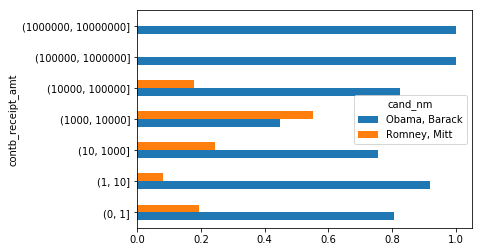

In [47]:
normed_sums.plot.barh()

### 14.5.3 按州进行捐赠统计

In [48]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


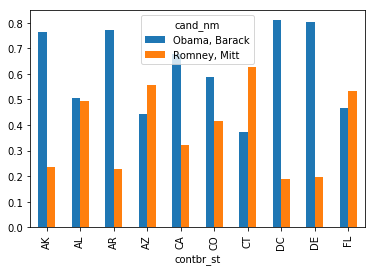

In [56]:
precent = totals.div(totals.sum(1), axis=0)
precent[:10].plot.bar()